# Practical Session of Week 4 - Review + Correlation between Variables
This notebook contains the exercises and concepts of **Data Science Practice discipline**.  
Throughout the notebook, we will:

- Review key concepts of quantitative features in rectangular data.
- Solve guided examples and exercises to consolidate learning.

The purpose of this notebook is to consolidate knowledge previously discussed and deepen the EDA techniques through knowledge of associations/correlations between variables.

# Part 1: Review
In this section, we will explore fundamental concepts of quantitative features in rectangular data.

- Central Tendency: Mean, Median, Mode
- Dispersion: Range, IQR, Variance, STD
- Frequency Tables and Categorical Feature Summaries
- Notion of A Distribution
- Population vs Sample

# Part 2: Linear Correlations
- Correlation between variables
- Dispersion charts

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Part 1 - Review for the next week test

### Exercise 1
Create a DataFrame called `df_notas` with 50 rows, containing a `grade` column with random integer values **between 0 and 20**.

In [2]:
np.random.seed(42)
df_notas = pd.DataFrame({'grades': np.random.randint(0, 21, 50)})
df_notas.head()

,grades
0,6
1,19
2,14
3,10
4,7


### Exercise 2
Add to DataFrame `df_notas` A column called `status` that classifies each student as `Pass` if the **grade is > = 10** or `Fail` otherwise. Try to do this without using loops with `np.where`.

In [3]:
# add status column
df_notas['status'] = np.where(df_notas['grades'] >= 10, 'Pass', 'Fail')
df_notas.head()

,grades,status
0,6,Fail
1,19,Pass
2,14,Pass
3,10,Pass
4,7,Fail


In [5]:
df_notas['status'].value_counts()

status
Pass    29
Fail    21
Name: count, dtype: int64

<Axes: xlabel='status'>

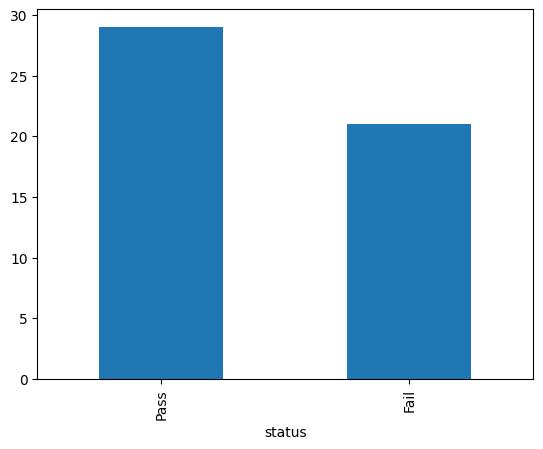

In [4]:
df_notas['status'].value_counts().plot(kind='bar')

### Exercise 3
Calculate the average, median and quartis (q1, q2, q3) of the grades.

In [6]:
df_notas.describe()

,grades
count,50.000000
mean,10.960000
std,6.343758
min,0.000000
25%,6.000000
50%,11.000000
75%,17.000000
max,20.000000


### Exercise 4
Create a histogram of grades with 10 bins.

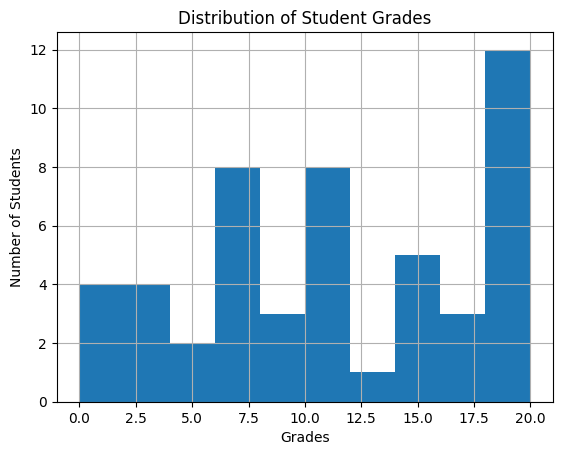

In [9]:
df_notas.hist(bins=10)
plt.xlabel('Grades')
plt.ylabel('Number of Students')
plt.title('Distribution of Student Grades')
plt.show()

### Exercise 5
Create a grades boxplot to analyze the distribution.

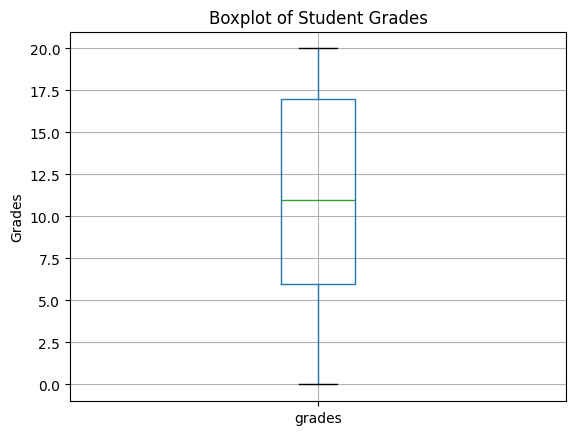

In [10]:
# grades boxplot to analyze distribution
df_notas.boxplot(column='grades')
plt.ylabel('Grades')
plt.title('Boxplot of Student Grades')
plt.show()

### Exercise 6
Create a DataFrame `df_salarios` with 100 random salaries between 1200 and 8000.

In [12]:
np.random.seed(42)
df_salarios = pd.DataFrame({'salary': np.random.randint(1200, 8001, 100)})
df_salarios.head()

,salary
0,2060
1,6590
2,6426
3,6391
4,4972


### Exercise 7
Add to DataFrame `df_salarios` a `salary_range` column that classifies each salary in:
`Low` (<Q1), `Medium` (between Q1 and Q3) and `High` (> Q3).

In [ ]:
# Calculate quartiles
q1 = df_salarios['salary'].quantile(0.25)
q3 = df_salarios['salary'].quantile(0.75)

# using loc to classify Salaries according to quartiles intervals
df_salarios.loc[df_salarios['salary'] < q1, 'salary_range'] = 'Low'
df_salarios.loc[(df_salarios['salary'] >= q1) & (df_salarios['salary'] <= q3), 'salary_range'] = 'Medium'
df_salarios.loc[df_salarios['salary'] > q3, 'salary_range'] = 'High'
df_salarios

,salary,salary_level,salary_range
0,2060,Low,Low
1,6590,High,High
2,6426,High,High
3,6391,High,High
4,4972,Medium,Medium
...,...,...,...
95,2216,Low,Low
96,7639,High,High
97,1537,Low,Low
98,2078,Low,Low


In [16]:
df_salarios['salary_range'].value_counts()

salary_range
Medium    50
Low       25
High      25
Name: count, dtype: int64

**Alternatively, you can use `pd.cut`**

In [ ]:
# Calculate quartiles
q1 = df_salarios['salary'].quantile(0.25)
q3 = df_salarios['salary'].quantile(0.75)

# pd.cut to classify Salaries
df_salarios['salary_range'] = pd.cut(df_salarios['salary'], 
                                      bins=[0, q1, q3, np.inf], 
                                      labels=['Low', 'Medium', 'High'])

df_salarios


,salary,salary_level
0,2060,Low
1,6590,High
2,6426,High
3,6391,High
4,4972,Medium
...,...,...
95,2216,Low
96,7639,High
97,1537,Low
98,2078,Low


### Exercise 8
Create a histogram and a boxplot of salaries.

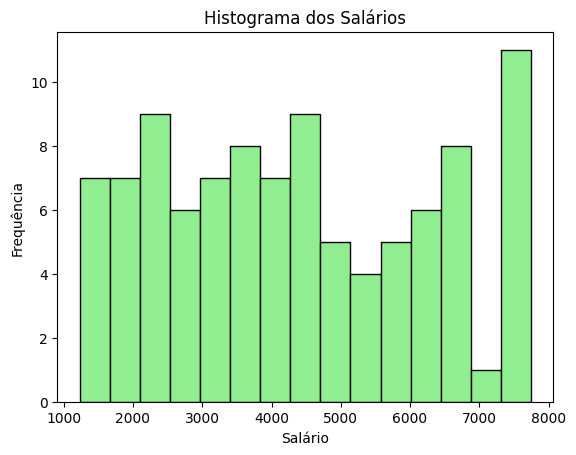

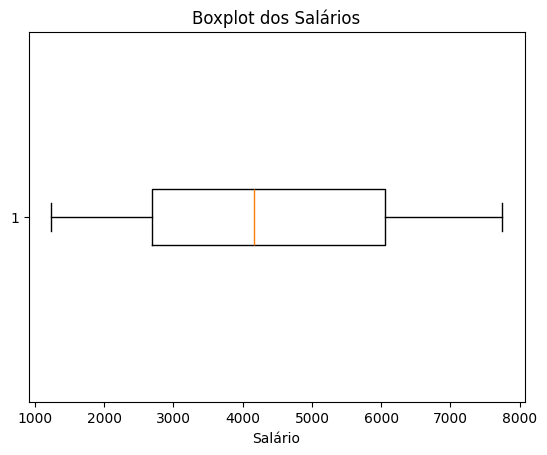

### Exercise 9
Create two DataFrames: `df_clients` (with `client_id` and `name`) and` df_purchases` (with `client_id` and `value` of purchase). Finally, merge the DataFrames (`pd.merge`).

In [17]:
df_clients = pd.DataFrame({
    'client_id': [1, 2, 3, 4, 5],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'age': [28, 34, 29, 42, 23]})

df_clients

,client_id,name,age
0,1,Alice,28
1,2,Bob,34
2,3,Charlie,29
3,4,David,42
4,5,Eva,23


In [18]:
df_purchases = pd.DataFrame({
    'client_id': [1, 2, 1, 3, 4, 2, 5, 3],
    'value': [250, 450, 300, 150, 500, 200, 700, 100]})

df_purchases

,client_id,value
0,1,250
1,2,450
2,1,300
3,3,150
4,4,500
5,2,200
6,5,700
7,3,100


In [19]:
df_merged = pd.merge(df_clients, df_purchases, on='client_id', how='inner')
df_merged

,client_id,name,age,value
0,1,Alice,28,250
1,1,Alice,28,300
2,2,Bob,34,450
3,2,Bob,34,200
4,3,Charlie,29,150
5,3,Charlie,29,100
6,4,David,42,500
7,5,Eva,23,700


**Alternatively, you can do like that**

In [20]:
df_merged = df_clients.merge(df_purchases, on='client_id', how='inner')
df_merged

,client_id,name,age,value
0,1,Alice,28,250
1,1,Alice,28,300
2,2,Bob,34,450
3,2,Bob,34,200
4,3,Charlie,29,150
5,3,Charlie,29,100
6,4,David,42,500
7,5,Eva,23,700


### Exercise 10
In the resulting DataFrame of the merge, create a new column called `with_discount` Apply **10% discount** to the purchase value.

In [26]:
df_merged['with_discount'] = df_merged['value'] * 0.9
df_merged

,client_id,name,age,value,with_discount
0,1,Alice,28,250,225.0
1,1,Alice,28,300,270.0
2,2,Bob,34,450,405.0
3,2,Bob,34,200,180.0
4,3,Charlie,29,150,135.0
5,3,Charlie,29,100,90.0
6,4,David,42,500,450.0
7,5,Eva,23,700,630.0


## Part 2 - Linear Correlations

In [ ]:
# install scipy if it is not installed already
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 14.8 MB/s  0:00:01 eta 0:00:01


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Exercise 1
Create two x and y vectors with 100 data points (`y = 2x + noise`). Scatter plot the data.

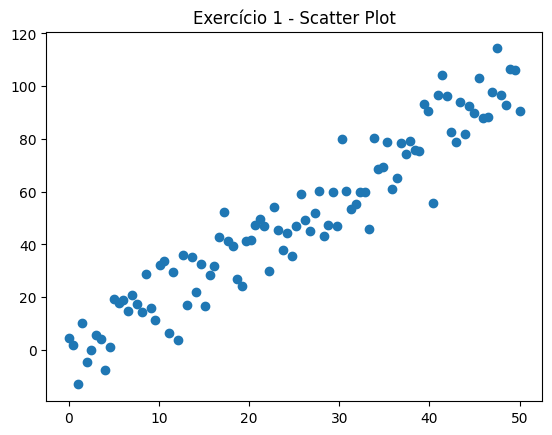

In [30]:
x = np.linspace(0, 50, 100)
y = 2*x + np.random.normal(0, 10, 100)
plt.scatter(x, y)
plt.title("Exercício 1 - Scatter Plot")
plt.show()

### Exercise 2
Use seaborn.Pairplot to view relationships between 4 random variables.

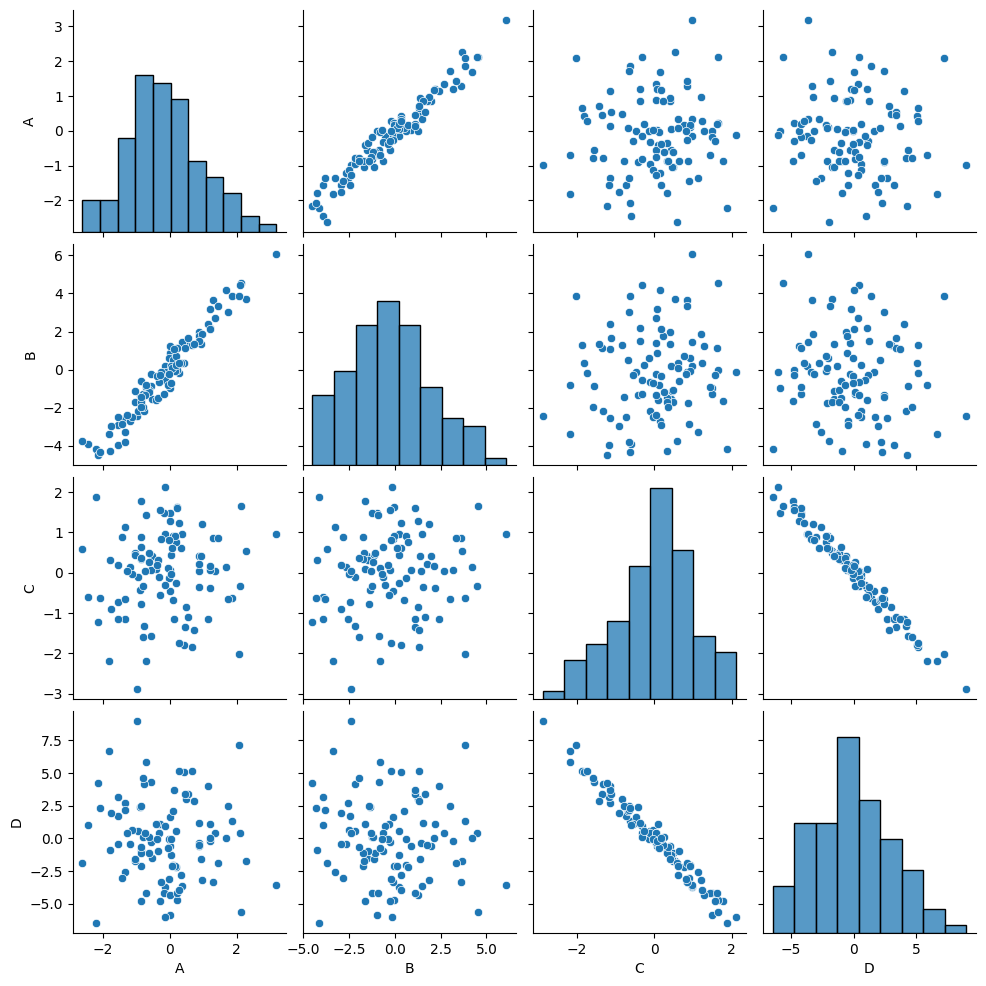

In [31]:
df = pd.DataFrame(np.random.randn(100, 4), columns=list("ABCD"))
# Create A Linear Relation Between A And B
df["B"] = df["A"] * 2 + np.random.normal(0, 0.5, 100)
# Create Linear Relation Between C and D
df["D"] = df["C"] * -3 + np.random.normal(0, 0.5, 100)
sns.pairplot(df)

### Exercise 3
Generate a linear association (`y = 3x + noise`) and **scatter plott with trend line**.

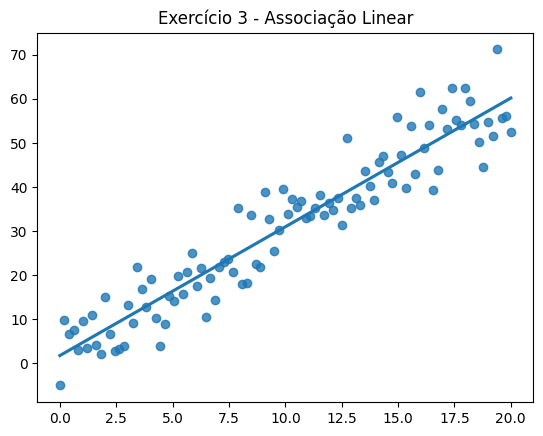

In [32]:
x = np.linspace(0, 20, 100)
y = 3*x + np.random.normal(0, 5, 100)
sns.regplot(x=x, y=y, ci=None)
plt.title("Exercício 3 - Associação Linear")
plt.show()

### Exercise 4
Generate a nonlinear association (`y = x^2 + noise`) and a scatter plot.

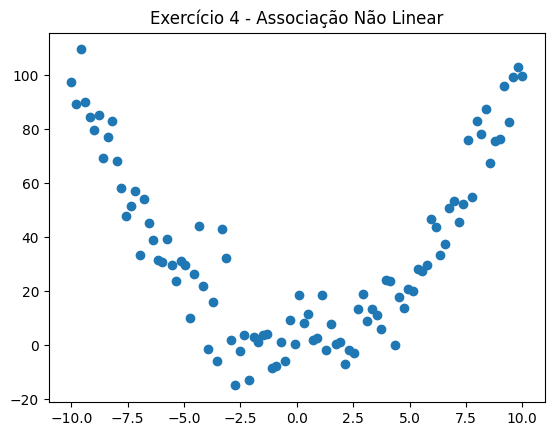

In [33]:
x = np.linspace(-10, 10, 100)
y = x**2 + np.random.normal(0, 10, 100)
plt.scatter(x, y)
plt.title("Exercício 4 - Associação Não Linear")
plt.show()

### Exercise 5
Calculate **Pearson's correlation** between x and y of **Exercise 3**. Explain the result.

In [34]:
pearson_corr = stats.pearsonr(x, y)
print(pearson_corr)



PearsonRResult(statistic=np.float64(0.01075767776715314), pvalue=np.float64(0.9154019864542098))


### Exercise 6
Calculate the `Spearman Correlation` between X and Y of `Exercise 4`. Explain the result.

In [35]:
spearman_corr = stats.spearmanr(x, y)
spearman_corr


SignificanceResult(statistic=np.float64(-0.0016081608160816079), pvalue=np.float64(0.987330580098831))

### Exercise 7
Compare **Pearson** and **Spearman** in quadratic data.

In [36]:
x = np.linspace(-5, 5, 100)
y = x**2
pearson = stats.pearsonr(x, y)
spearman = stats.spearmanr(x, y)
pearson, spearman
# Explain The Results
# In Quadratic Data, Pearson Correlation may be Low or Zero Because It measures Linear Relationships, While Spearman Correlation Captures The Monotonic Relationship, Resulting in A Higher Value.

(PearsonRResult(statistic=np.float64(-6.938893903907228e-18), pvalue=np.float64(1.0)),
 SignificanceResult(statistic=np.float64(-0.002646479021386217), pvalue=np.float64(0.9791519704231377)))

### Exercise 8
Simulate data with **weak correlation (high noise)**. Show scatter plot.

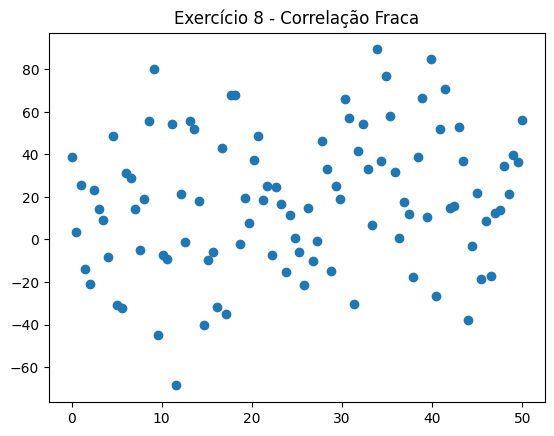

In [37]:
x = np.linspace(0, 50, 100)
y = 0.5*x + np.random.normal(0, 30, 100)
plt.scatter(x, y)
plt.title("Exercício 8 - Correlação Fraca")
plt.show()

### Exercise 9
Simulate data with **moderate correlation**.

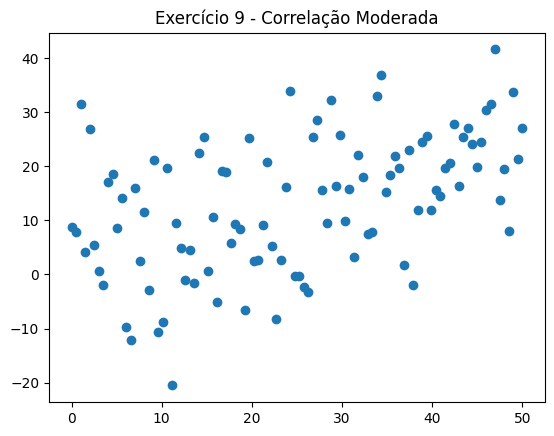

In [38]:
x = np.linspace(0, 50, 100)
y = 0.5*x + np.random.normal(0, 10, 100)
plt.scatter(x, y)
plt.title("Exercício 9 - Correlação Moderada")
plt.show()

### Exercise 10
Simulate data with **strong correlation**.

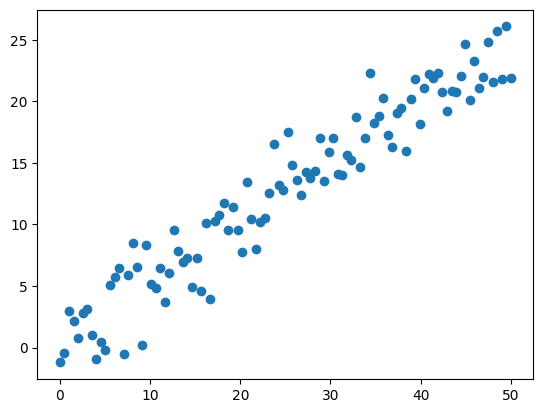

In [39]:
x = np.linspace(0, 50, 100)
y = 0.5*x + np.random.normal(0, 2, 100)
plt.scatter(x, y)

### Exercise 11
Test significance of **Pearson's correlation** in data with 20 data points.

In [40]:
x = np.linspace(0, 10, 20)
y = 2*x + np.random.normal(0, 5, 20)
stats.pearsonr(x, y)

PearsonRResult(statistic=np.float64(0.6608581225382373), pvalue=np.float64(0.001512948327507025))

### Exercise 12
Test significance of **Pearson's correlation** in data with 200 data points.

In [41]:
x = np.linspace(0, 10, 200)
y = 0.2*x + np.random.normal(0, 5, 200)
stats.pearsonr(x, y)

PearsonRResult(statistic=np.float64(0.15830872170829252), pvalue=np.float64(0.025160599238270267))

### Exercise 13
Create scatter plot with categories.

In [42]:
df = pd.DataFrame({
    "x": np.random.randn(100),
    "y": np.random.randn(100),
    "grupo": np.random.choice(["A", "B"], 100)
})


### Exercise 14
Show correlation matrix with Seaborn Heatmap.

In [43]:
df = pd.DataFrame(np.random.randn(100, 5), columns=list("ABCDE"))


### Exercise 15
Check non-linear correlation.

(PearsonRResult(statistic=np.float64(-0.07589466694797184), pvalue=np.float64(0.4529607482441908)),
 SignificanceResult(statistic=np.float64(-0.07504350435043504), pvalue=np.float64(0.45805859611033717)))

### Exercise 16
Based on what we have learned above, analyze the `Auto.csv` dataset and search for interesting correlations.